#K-means Clustering

## Introduction
This tutorial will introduce you to the k-means clustering algorithm, providing examples of how the algorithm works on different datasets. We will go in-depth into the specific use cases of the algorithm and its advantages and disadvantages. We will be using the [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) implementation of k-means clustering for Python.

Clustering is the task of grouping a set of objects into different groups, called clusters, where the data in the same cluster are more similar to each other than those in other clusters. Clustering is an unsupervised algorithm, which means it infers a function to fit unlabeled data in order to find some hidden or underlying structure within the data. This is fundamentally different from supervised learning which fits a model to predict labels for labeled data.

There are many algorithms that can be used to tackle clustering; each uses different metrics for defining a cluster. In this tutorial, we will focus specifically on k-means clustering, one of the simplest and most intuitive clustering techniques.



## Overview of the Algorithm
K-means clustering is an unsupervised learning algorithm that classifies a data set into k clusters by minimizing the within-cluster sum of squares, called inertia. The within-cluster sum of squares calculated as the sum of the distance functions of each point to the cluster center or centroid.

$$J = argmin \sum\limits_{j=1}^k \sum\limits_{i=1}^n ||x_{i} - \mu_{j}||^2 $$
Where $x_{i}$ is a datapoint belonging to cluster $j$ and $\mu_{j}$ is the cluster center.

The general algorithm follows these steps:
1. Start off with placing k points randomly in our data; these will be known as our centroids.
2. Assign each observation to the centroid that yields the lowest within-cluster sum of squares. 
3. Update the location of the centroids to the mean of all data that were assigned to the centroid. 

We repeat steps 2 and 3 until we reach a point where updating the centroid's mean did not result in any of the observations being assigned to a different centroid. When this terminates, all the data points that are assigned to the same centroid are part of the same cluster.

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-library)
- [Exploring the k-means algorithm on randomly generated data](#Exploring-the-k-means-algorithm-on-randomly-generated-data)
- [Choosing the optimal number of clusters](#Choosing-the-optimal-number-of-clusters)
- [Exploring k-means clustering on Iris dataset](#Exploring-k-means-clustering-on-Iris-dataset)
- [K-means++ Initialization](#K-means++-Initialization)
- [Shortcomings of k-means clustering](#Shortcomings-of-k-means-clustering)



## Installing the library
For clustering in Python, we will utilize the prebuilt k-means function inside the scikit-learn library.

First, we must install the library the before we can use it. One way is to install it is through $\textit{conda}$ by running:

    conda install scikit-learn

If you already have a working installation of numpy and scipy, you can install sci-kit using $\textit{pip}$ instead by running:

    pip install -U scikit-learn


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy import cluster

/Users/Charles/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


##Exploring the k-means algorithm on randomly generated data


We will start by exploring a dataset is generated randomly with two features from a uniform distribution. The k-means algorithm splits the data roughly into fourths. 

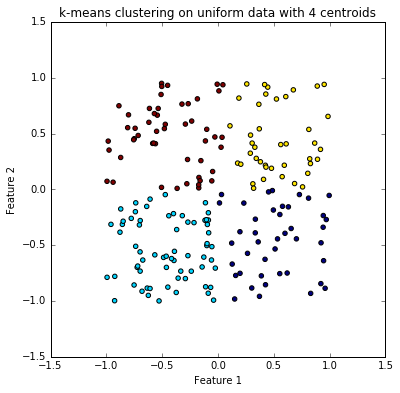

In [2]:
X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(200)])

#K-means with 4 clusters
kmeans_uniform = KMeans(n_clusters=4, random_state=2, init="random")
y_pred_uniform = kmeans_uniform.fit_predict(X)
plt.figure(1, figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_uniform.astype(np.float))
plt.title("k-means clustering on uniform data with 4 centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We will now explore a dataset that has inherent groupings. We generate 500 samples with 2 features each, which come from a dataset that has four main centers.

In [3]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=4, random_state=2)
print X[:5] #number of features
print set(y) #labels for the groups


[[ -0.72864791  -7.18926735]
 [ -6.20343589   2.97077943]
 [ -2.82677657 -11.5641273 ]
 [ -1.93726763  -5.39538281]
 [ -4.81148506   1.18125136]]
set([0, 1, 2, 3])


Now we will run a k-means clustering algorithm with four clusters on the dataset we just generated. Since we had the same number of clusters as we have groups, it did a great job clustering them.

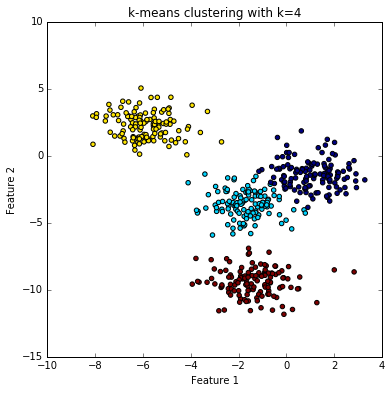

In [4]:
#K-means with correct number of clusters
kmeans_4 = KMeans(n_clusters=4, random_state=2, init="random")
y_pred_4 = kmeans_4.fit_predict(X)

fig = plt.figure(1, figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_4.astype(np.float))
plt.title("k-means clustering with k=4")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We will now explore what happens if we chose an incorrect number of clusters. We will use the same dataset, but this time running the k-means algorithm with 2 clusters and with 8 clusters.

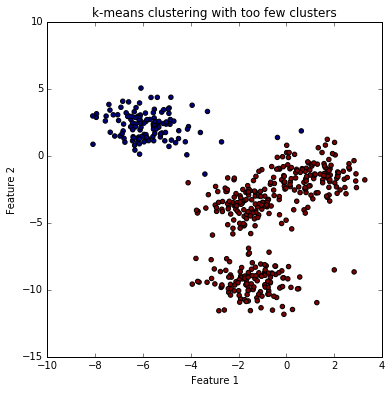

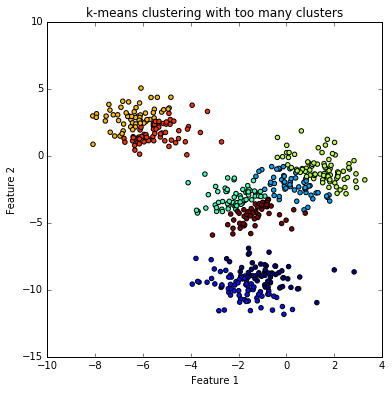

In [5]:
#K-means with too few clusters
kmeans_2 = KMeans(n_clusters=2, random_state=2, init="random")
y_pred_2 = kmeans_2.fit_predict(X)
fig = plt.figure(1, figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_2.astype(np.float))
plt.title("k-means clustering with too few clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#K-means with too many clusters
kmeans_8 = KMeans(n_clusters=8, random_state=2, init="random")
y_pred_8 = kmeans_8.fit_predict(X)
fig = plt.figure(1, figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_8.astype(np.float))
plt.title("k-means clustering with too many clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Choosing the incorrect number of clusters will cause problems. Too few clusters and the within-clusters sum of square errors (SSE) will be extremely large for one of the clusters. Too many clusters will lead to many centroids competing for the same group. 

Prior to running the clustering, we knew that the data inherently had three groups in it. In the case of actual unsupervised learning, we wouldn't know how many clusters to initialize our k-means algorithm with.


##Choosing the optimal number of clusters
We can choose the optimal number of clusters to use by applying the elbow method. The idea behind the elbow method is to run the k-means clustering for a range of values, representing the number of clusters. We can get a good approximation for the optimal number of clusters for the algorithm by plotting the within-clusters SSE against the number of clusters. The within-cluster SSE has diminishing returns as we increase the number of clusters. Thus we can choose our number of clusters to be a good balance between minimizing the within-cluster SSE and minimizing the number of clusters.

We will choose the point where adding another cluster doesn't give a much better modeling of the data. Applying the elbow method on our previous dataset gives us 3 clusters as our optimal number of clusters.

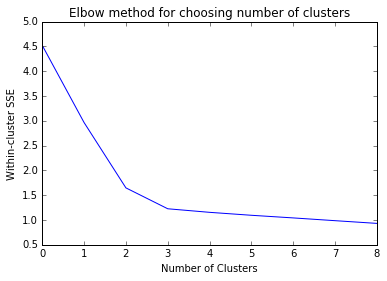

In [6]:
#Elbow method
initial = [cluster.vq.kmeans(X, i) for i in range(1,10)]
plt.plot([intertia for (cent, intertia) in initial])
plt.title("Elbow method for choosing number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster SSE")
plt.show()

##Exploring k-means clustering on Iris dataset
We now be explore the famous iris dataset, which includes four features: sepal length, sepal width, petal length, and petal width for three species of irises: setosa, versicolor, and virginica. In this dataset, setosa is represented by 0, versicolor is represented by 1 and virginica is represented by 2. 

In [7]:
iris = datasets.load_iris()
features = iris.data
categories = iris.target

print iris.feature_names
print features[0:5]

print iris.target_names
print set(categories)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
['setosa' 'versicolor' 'virginica']
set([0, 1, 2])


We will start by using the elbow method to determine how many clusters we will need, ignoring the fact that we already know the true labels.

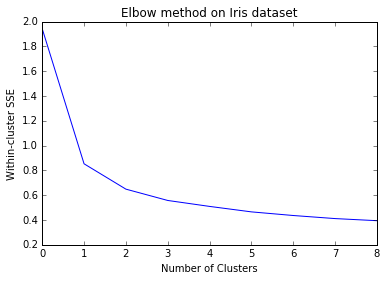

In [8]:
#Elbow method
initial = [cluster.vq.kmeans(features, i) for i in range(1,10)]
plt.plot([intertia for (cent, intertia) in initial])
plt.title("Elbow method on Iris dataset")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster SSE")
plt.show()

We will use 3 centroids for our exploration into the dataset since it is the "elbow" of our data. 

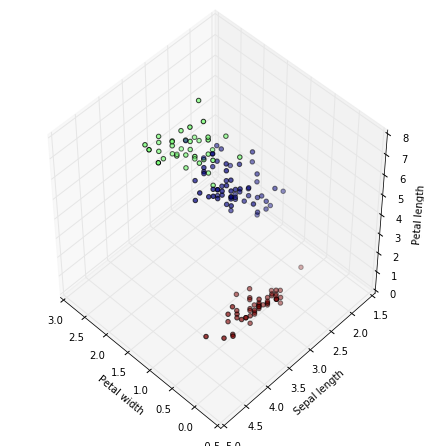

In [9]:
#3 centroids clustering
fig = plt.figure(1, figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

kmeans_iris = KMeans(n_clusters=3, random_state=2, init="random")
y_pred_iris = kmeans_iris.fit_predict(features)
ax.scatter(features[:,3], features[:,1], features[:,2], c=y_pred_iris.astype(np.float))
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

Now lets compare the results of our clustering to the true labels of the data. Our clustering with 3 centroids did quite well in finding the inherent difference for the features for the different species of iris. 

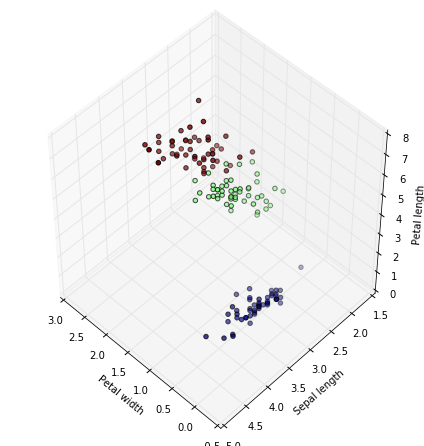

In [10]:
#True iris labels
fig = plt.figure(1, figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(features[:,3], features[:,1], features[:,2], c=categories)
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

##K-means++ Initialization
The initial location of the centroids is extremely important. Poor initializations may cause the k-means algorithm to converge to a local minimum for the within-cluster SSE or make the computation take a much longer time for convergence. The k-means++ algorithm typically improves the run-time and finds solutions with less error.

The algorithm chooses the initial values by spreading out the cluster centers as opposed to choosing them randomly. The first centroid is chosen randomly from the datapoints being clustered. The subsequent cluster centers are chosen from the remaining datapoints with probability proportional to its squared distance from the closest existing centroid. 

This improved initialization yields a significant improvement in the final error of the k-means. It typically converges much more quickly than the standard algorithm, with increases of speed of around 2-fold. The scikit-learn implementation of k-means clustering defaults to this algorithm.

We will compare the k-means++ initialization against the random initialization on a new dataset that has 20 centers.

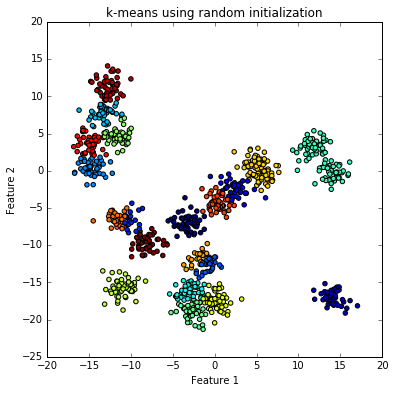

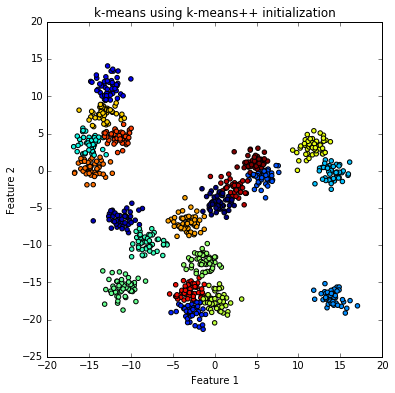

In [11]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=20, random_state=2, center_box=(-20, 20))

#Random initialization
kmeans_random = KMeans(n_clusters=20, random_state=2, init="random")
y_pred_random = kmeans_random.fit_predict(X)
fig = plt.figure(1, figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_random.astype(np.float))
plt.title("k-means using random initialization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#K-means++
kmeans_plusplus = KMeans(n_clusters=20, random_state=2, init="k-means++")
y_pred_plusplus = kmeans_plusplus.fit_predict(X)
fig = plt.figure(1, figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_plusplus.astype(np.float))
plt.title("k-means using k-means++ initialization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The within-cluster SSE is much lower for the k-means++ initialization because the random initialization of the k-means algorithm converged to a local minimum. It is apparent from the graph of the random initialization that some of the inherent groups have been shared by multiple centroids, while others have a single centroid representing multiple groups.

In [12]:
print("Random initialization: %d" % kmeans_random.inertia_)
print("K-means++ initialization: %d" % kmeans_plusplus.inertia_)

Random initialization: 2231
K-means++ initialization: 1734


##Shortcomings of k-means clustering
K-means clustering is one of the simplest and most intuitive algorithms, which makes it appealing for most tasks. It converges faster than other clustering algorithms but with that being said, it has some shortcomings for being a simple algorithm. One main shortcoming is that it can only find a local minimum of the within-cluster SSE; one way to mitigate this is to run the algorithm multiple times with different initializations. Since the algorithm minimizes the within-cluster sum of squares, the algorithm tends to lead to spherical and similar sized clusters. It does not perform well in scenarios where the data has unequal variance for groups or if the data is not isotropic. A clustering algorithm known as Expectation–Maximization can be used to tackle datasets that exhibit these traits. 

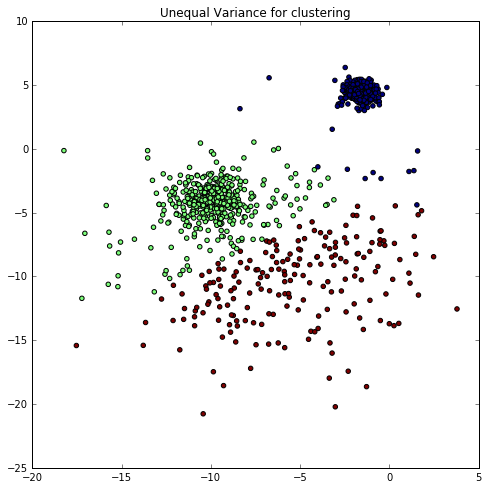

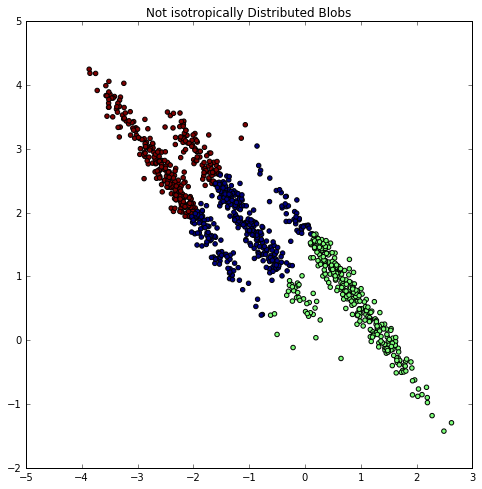

In [14]:
X, y = datasets.make_blobs(n_samples=1000, random_state=3)

#Unequal Variance
plt.figure(1, figsize=(8, 8))
X_varied, y_varied = datasets.make_blobs(n_samples=1000, cluster_std=[.5, 1, 4], random_state=1)
kmeans_unequal_variance = KMeans(n_clusters=3, random_state=1)
y_pred_varied = kmeans_unequal_variance.fit_predict(X_varied)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_varied)
plt.title("Unequal Variance for clustering")
plt.show()

#Not isotropically distributed
plt.figure(1, figsize=(8, 8))
X_transformed = np.dot(X, [[.5, -.5], [-.4, .6]])
kmeans_transformed = KMeans(n_clusters=3, random_state=1)
y_pred_transformed = kmeans_transformed.fit_predict(X_transformed)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred_transformed)
plt.title("Not isotropically Distributed Blobs")
plt.show()

##Summary and references
1. K-means algorithm: https://en.wikipedia.org/wiki/K-means_clustering
2. Scikit-learn: http://scikit-learn.org/
3. Iris Dataset http://archive.ics.uci.edu/ml/datasets/Iris
4. K-means++: https://en.wikipedia.org/wiki/K-means%2B%2B
5. Expectation-Maximization algorithm: https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm
6. Additional Clustering techniques: http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/